In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gzip

In [2]:
#import data
file_path = './airbnb_dataset/Airbnb_Data.tar.gz'
with gzip.open(file_path, 'rt', encoding='utf-8') as f:
    df = pd.read_csv(f,low_memory=False)
pd.set_option('display.max_columns', None)

## Data Preprocessing

In [3]:
df.head()

,14fc7c55076590dad3ef272ad3efff7c.csv,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257.0,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3.0,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2.0,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928.0,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7.0,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6.0,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400.0,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5.0,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10.0,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779.0,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4.0,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0.0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709.0,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2.0,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4.0,40.0,NaN,20009,0.0,1.0


In [4]:
df.shape

(74112, 29)

In [5]:
df.tail()

,14fc7c55076590dad3ef272ad3efff7c.csv,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
74107,13281809.0,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4.0,2.0,Real Bed,moderate,True,LA,"Located on the Pacific Coast Highway, this apa...",2016-08-15,t,f,100%,2016-05-03,f,2017-04-15,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16.0,93.0,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0
74108,18688039.0,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5.0,1.0,Real Bed,moderate,True,NYC,A modern apartment located in East Williamsbur...,2015-01-03,t,t,100%,2012-01-05,t,2017-09-10,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43.0,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206.0,2.0,2.0
74109,17045948.0,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2.0,1.0,Real Bed,strict,True,NYC,"Fully renovated, designer's studio located in ...",NaN,t,f,100%,2017-09-17,t,NaN,40.738535,-74.000157,Designer's Apartment in HEART of NYC,West Village,0.0,NaN,https://a0.muscache.com/im/pictures/b3971b63-0...,10011,0.0,2.0
74110,3534845.0,4.852030,Boat,Entire home/apt,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",4.0,1.0,Real Bed,moderate,False,LA,You will stay-aboard the Island Trader at one ...,2013-09-05,t,t,100%,2012-11-26,f,2017-04-30,33.761096,-118.192409,Cozy Boat at Shoreline Village,Long Beach,205.0,96.0,https://a0.muscache.com/im/pictures/22968537/d...,90802,1.0,2.0
74111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = df[:-1]

In [7]:
df.shape

(74111, 29)

In [8]:
df.dtypes

14fc7c55076590dad3ef272ad3efff7c.csv    float64
log_price                               float64
property_type                            object
room_type                                object
amenities                                object
accommodates                            float64
bathrooms                               float64
bed_type                                 object
cancellation_policy                      object
cleaning_fee                             object
city                                     object
description                              object
first_review                             object
host_has_profile_pic                     object
host_identity_verified                   object
host_response_rate                       object
host_since                               object
instant_bookable                         object
last_review                              object
latitude                                float64
longitude                               

In [9]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

bathrooms                   200
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
last_review               15827
neighbourhood              6872
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [10]:
df['14fc7c55076590dad3ef272ad3efff7c.csv'] = pd.to_numeric(df['14fc7c55076590dad3ef272ad3efff7c.csv'], errors='coerce', downcast='integer')
df.rename(columns={'14fc7c55076590dad3ef272ad3efff7c.csv': 'id'}, inplace=True)

In [11]:
unique_values_counts = {col: df[col].nunique() for col in df.columns}
unique_values_counts

{'id': 74111,
 'log_price': 767,
 'property_type': 35,
 'room_type': 3,
 'amenities': 67122,
 'accommodates': 16,
 'bathrooms': 17,
 'bed_type': 5,
 'cancellation_policy': 5,
 'cleaning_fee': 2,
 'city': 6,
 'description': 73479,
 'first_review': 2554,
 'host_has_profile_pic': 2,
 'host_identity_verified': 2,
 'host_response_rate': 80,
 'host_since': 3087,
 'instant_bookable': 2,
 'last_review': 1371,
 'latitude': 74111,
 'longitude': 74111,
 'name': 73359,
 'neighbourhood': 619,
 'number_of_reviews': 371,
 'review_scores_rating': 54,
 'thumbnail_url': 65883,
 'zipcode': 769,
 'bedrooms': 11,
 'beds': 18}

In [12]:
df_encoded = pd.get_dummies(df, columns=[
    'property_type', 'room_type', 'bed_type', 'cancellation_policy',
     'city','cleaning_fee','host_has_profile_pic', 'host_identity_verified',
     'instant_bookable'
     ])

In [13]:
df_encoded

,id,log_price,amenities,accommodates,bathrooms,description,first_review,host_response_rate,host_since,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Casa particular,property_type_Castle,property_type_Cave,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_Earth House,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Hut,property_type_In-law,property_type_Island,property_type_Lighthouse,property_type_Loft,property_type_Other,property_type_Parking Space,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tipi,property_type_Townhouse,property_type_Train,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,cleaning_fee_False,cleaning_fee_True,host_has_profile_pic_f,host_has_profile_pic_t,host_identity_verified_f,host_identity_verified_t,instant_bookable_f,instant_bookable_t
0,6901257,5.010635,"{""Wireless Internet"",""Air conditioning"",Kitche...",3.0,1.0,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,NaN,2012-03-26,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2.0,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0
1,6304928,5.129899,"{""Wireless Internet"",""Air conditioning"",Kitche...",7.0,1.0,Enjoy travelling during your stay in Manhattan...,2017-08-05,100%,2017-06-19,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6.0,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1
2,7919400,4.976734,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5.0,1.0,The Oasis comes complete with a full backyard ...,2017-04-30,100%,2016-10-25,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10.0,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1
3,13418779,6.620073,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4.0,1.0,This light-filled home-away-from-home is super...,NaN,NaN,2015-04-19,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0.0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0
4,3808709,4.744932,"{TV,Internet,""Wireless Internet"",""Air conditio...",2.0,1.0,"Cool, cozy, and comfortable studio located in ...",2015-05-12,100%,2015-03-01,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4.0,40.0,NaN,20009,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [14]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3.0,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2.0,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7.0,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6.0,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5.0,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10.0,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4.0,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0.0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2.0,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4.0,40.0,NaN,20009,0.0,1.0


In [15]:
df_encoded.shape

(74111, 82)

In [16]:
missing_values = df_encoded.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

bathrooms                 200
first_review            15864
host_response_rate      18299
host_since                188
last_review             15827
neighbourhood            6872
review_scores_rating    16722
thumbnail_url            8216
zipcode                   966
bedrooms                   91
beds                      131
dtype: int64

We remove the column with an excessively large number of categories, making it unsuitable for one-hot encoding.

Also remove the observation that containing a small number of missing values.

In [17]:
df_encoded.drop(['thumbnail_url', 'zipcode','neighbourhood','first_review', 'last_review'], axis=1, inplace=True)
df_encoded.dropna(subset=['host_since'], inplace=True)


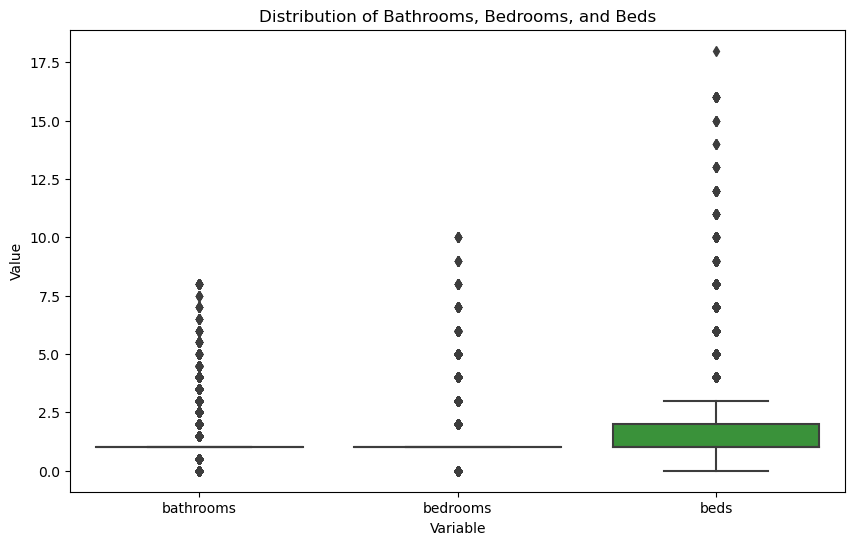

In [18]:
df_melted = df.melt(value_vars=['bathrooms', 'bedrooms', 'beds'], var_name='Variable', value_name='Value')

# Drawing the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Variable', y='Value', data=df_melted)
plt.title('Distribution of Bathrooms, Bedrooms, and Beds')
plt.show()

The boxplot reveals the presence of outliers, makes the median a more reliable measure than the mean for imputing missing values.

Then filling missing values in each column with the median of that column grouped by the 'accommodates' category.

In [19]:
for col in ['bathrooms', 'bedrooms', 'beds']:
    df_encoded[col] = df.groupby('accommodates')[col].transform(lambda x: x.fillna(x.median()))

In [20]:
df_encoded

,id,log_price,amenities,accommodates,bathrooms,description,host_response_rate,host_since,latitude,longitude,name,number_of_reviews,review_scores_rating,bedrooms,beds,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Casa particular,property_type_Castle,property_type_Cave,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_Earth House,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Hut,property_type_In-law,property_type_Island,property_type_Lighthouse,property_type_Loft,property_type_Other,property_type_Parking Space,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tipi,property_type_Townhouse,property_type_Train,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,cleaning_fee_False,cleaning_fee_True,host_has_profile_pic_f,host_has_profile_pic_t,host_identity_verified_f,host_identity_verified_t,instant_bookable_f,instant_bookable_t
0,6901257,5.010635,"{""Wireless Internet"",""Air conditioning"",Kitche...",3.0,1.0,"Beautiful, sunlit brownstone 1-bedroom in the ...",NaN,2012-03-26,40.696524,-73.991617,Beautiful brownstone 1-bedroom,2.0,100.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0
1,6304928,5.129899,"{""Wireless Internet"",""Air conditioning"",Kitche...",7.0,1.0,Enjoy travelling during your stay in Manhattan...,100%,2017-06-19,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,6.0,93.0,3.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1
2,7919400,4.976734,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5.0,1.0,The Oasis comes complete with a full backyard ...,100%,2016-10-25,40.808110,-73.943756,The Garden Oasis,10.0,92.0,1.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1
3,13418779,6.620073,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4.0,1.0,This light-filled home-away-from-home is super...,NaN,2015-04-19,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,0.0,NaN,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0
4,3808709,4.744932,"{TV,Internet,""Wireless Internet"",""Air conditio...",2.0,1.0,"Cool, cozy, and comfortable studio located in ...",100%,2015-03-01,38.925627,-77.034596,Great studio in midtown DC,4.0,40.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,{},1.0,1.0,one room in bushwick apt,NaN,2013-03-24,40.709025,-73.939405,one room bushwick,0.0,NaN,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,1,0
74107,13281809,5.043425,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4.0,2.0,"Located on the Pacific Coast Highway, this apa...",100%,2016-05-03,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,1

In [21]:
df.shape

(74111, 29)

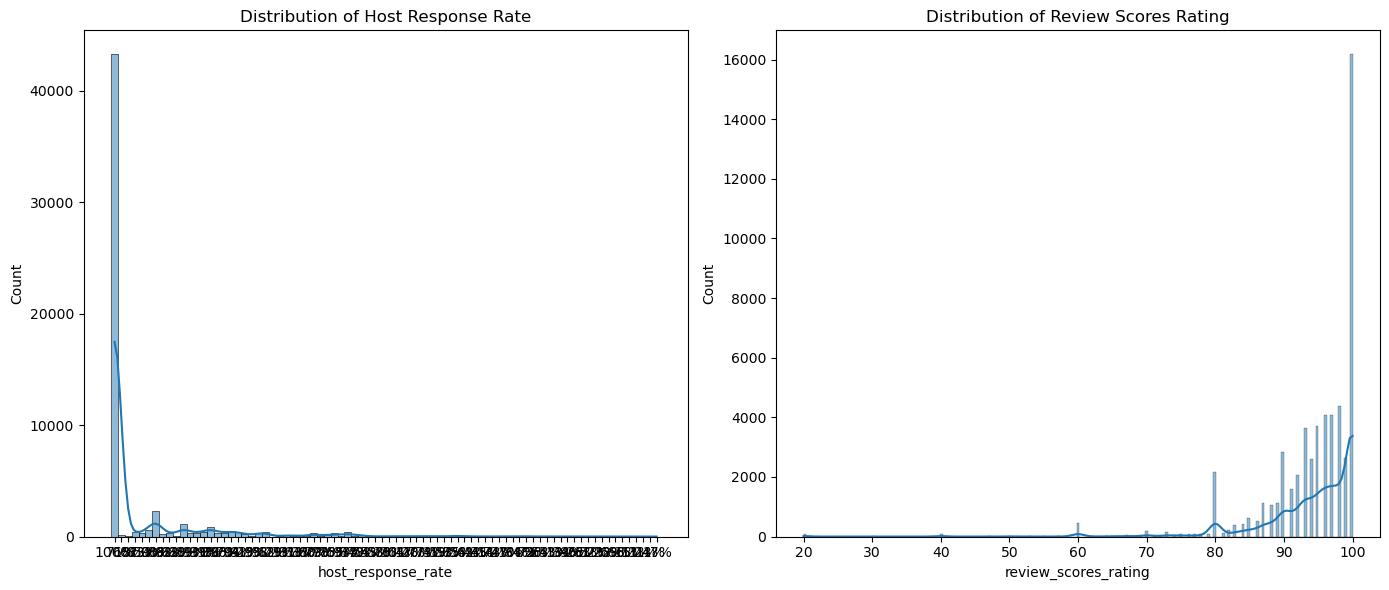

In [22]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_encoded['host_response_rate'], kde=True)
plt.title('Distribution of Host Response Rate')

plt.subplot(1, 2, 2)
sns.histplot(df_encoded['review_scores_rating'], kde=True)
plt.title('Distribution of Review Scores Rating')

plt.tight_layout()
plt.show()

In [23]:
# Impute missing 'host_response_rate' with the median
df_encoded['host_response_rate'] = df_encoded['host_response_rate'].str.rstrip('%').astype(float)
df_encoded['host_response_rate'].fillna(df_encoded['host_response_rate'].median(), inplace=True)

# Impute missing 'review_scores_rating' with the median
df_encoded['review_scores_rating'].fillna(df_encoded['review_scores_rating'].median(), inplace=True)


In [24]:
missing_values = df_encoded.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

Series([], dtype: int64)

In [25]:
df_encoded

,id,log_price,amenities,accommodates,bathrooms,description,host_response_rate,host_since,latitude,longitude,name,number_of_reviews,review_scores_rating,bedrooms,beds,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Casa particular,property_type_Castle,property_type_Cave,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_Earth House,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Hut,property_type_In-law,property_type_Island,property_type_Lighthouse,property_type_Loft,property_type_Other,property_type_Parking Space,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tipi,property_type_Townhouse,property_type_Train,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,cleaning_fee_False,cleaning_fee_True,host_has_profile_pic_f,host_has_profile_pic_t,host_identity_verified_f,host_identity_verified_t,instant_bookable_f,instant_bookable_t
0,6901257,5.010635,"{""Wireless Internet"",""Air conditioning"",Kitche...",3.0,1.0,"Beautiful, sunlit brownstone 1-bedroom in the ...",100.0,2012-03-26,40.696524,-73.991617,Beautiful brownstone 1-bedroom,2.0,100.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0
1,6304928,5.129899,"{""Wireless Internet"",""Air conditioning"",Kitche...",7.0,1.0,Enjoy travelling during your stay in Manhattan...,100.0,2017-06-19,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,6.0,93.0,3.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1
2,7919400,4.976734,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5.0,1.0,The Oasis comes complete with a full backyard ...,100.0,2016-10-25,40.808110,-73.943756,The Garden Oasis,10.0,92.0,1.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1
3,13418779,6.620073,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4.0,1.0,This light-filled home-away-from-home is super...,100.0,2015-04-19,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,0.0,96.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0
4,3808709,4.744932,"{TV,Internet,""Wireless Internet"",""Air conditio...",2.0,1.0,"Cool, cozy, and comfortable studio located in ...",100.0,2015-03-01,38.925627,-77.034596,Great studio in midtown DC,4.0,40.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,{},1.0,1.0,one room in bushwick apt,100.0,2013-03-24,40.709025,-73.939405,one room bushwick,0.0,96.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,1,0
74107,13281809,5.043425,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4.0,2.0,"Located on the Pacific Coast Highway, this apa...",100.0,2016-05-03,33.871549,-118.396053,Spacious Hermosa 2

In [26]:
df_encoded.shape

(73923, 77)

## Data Visulization

### Histogram

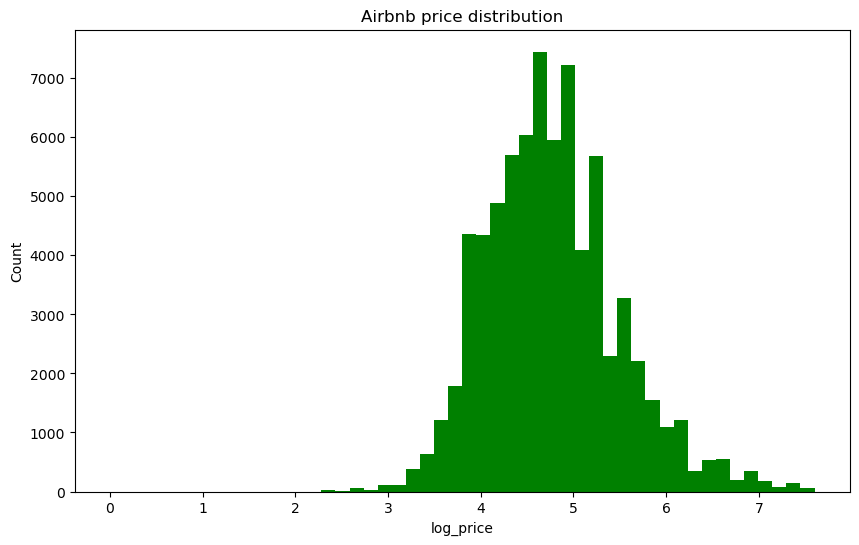

In [27]:
# Plot the distribution of the Airbnb log prices
plt.figure(figsize=(10, 6))
plt.hist(df['log_price'], bins=50, color='green')
plt.title('Airbnb price distribution')
plt.xlabel('log_price')
plt.ylabel('Count')
plt.show()

### Correlation matrix

In [28]:
# Select a subset of the dataframe for the Correlation matrix
numeric_features = ['log_price', 'accommodates', 'bathrooms', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds']
subset_df = df[numeric_features].dropna()
# Correlation matrix
corr_matrix = subset_df.corr()

### Heatmap

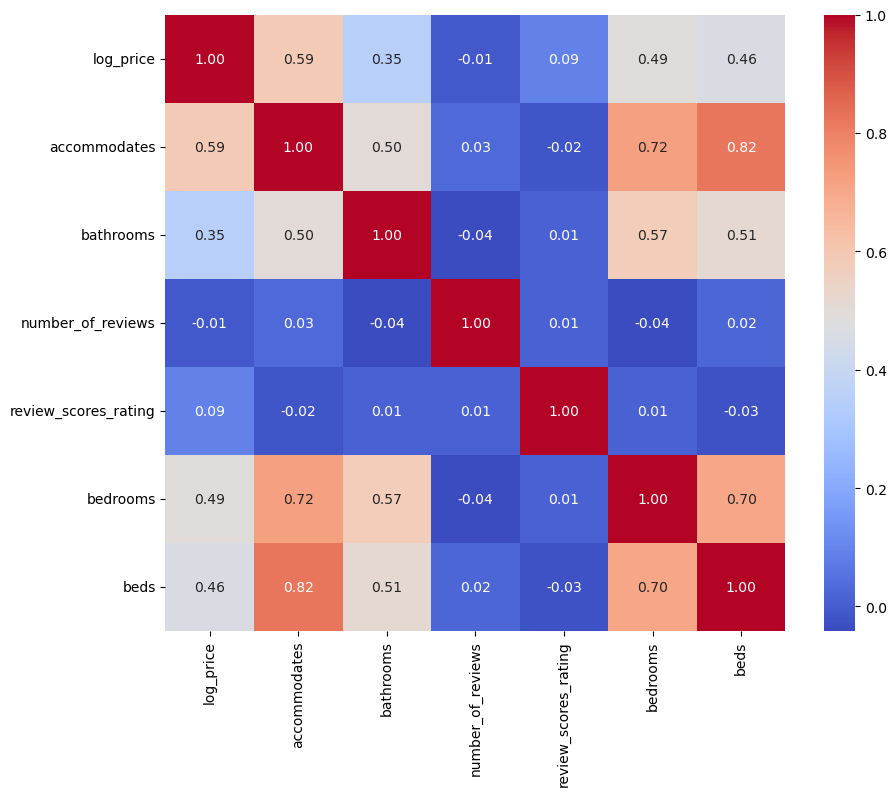

In [29]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

### Pairplot graph

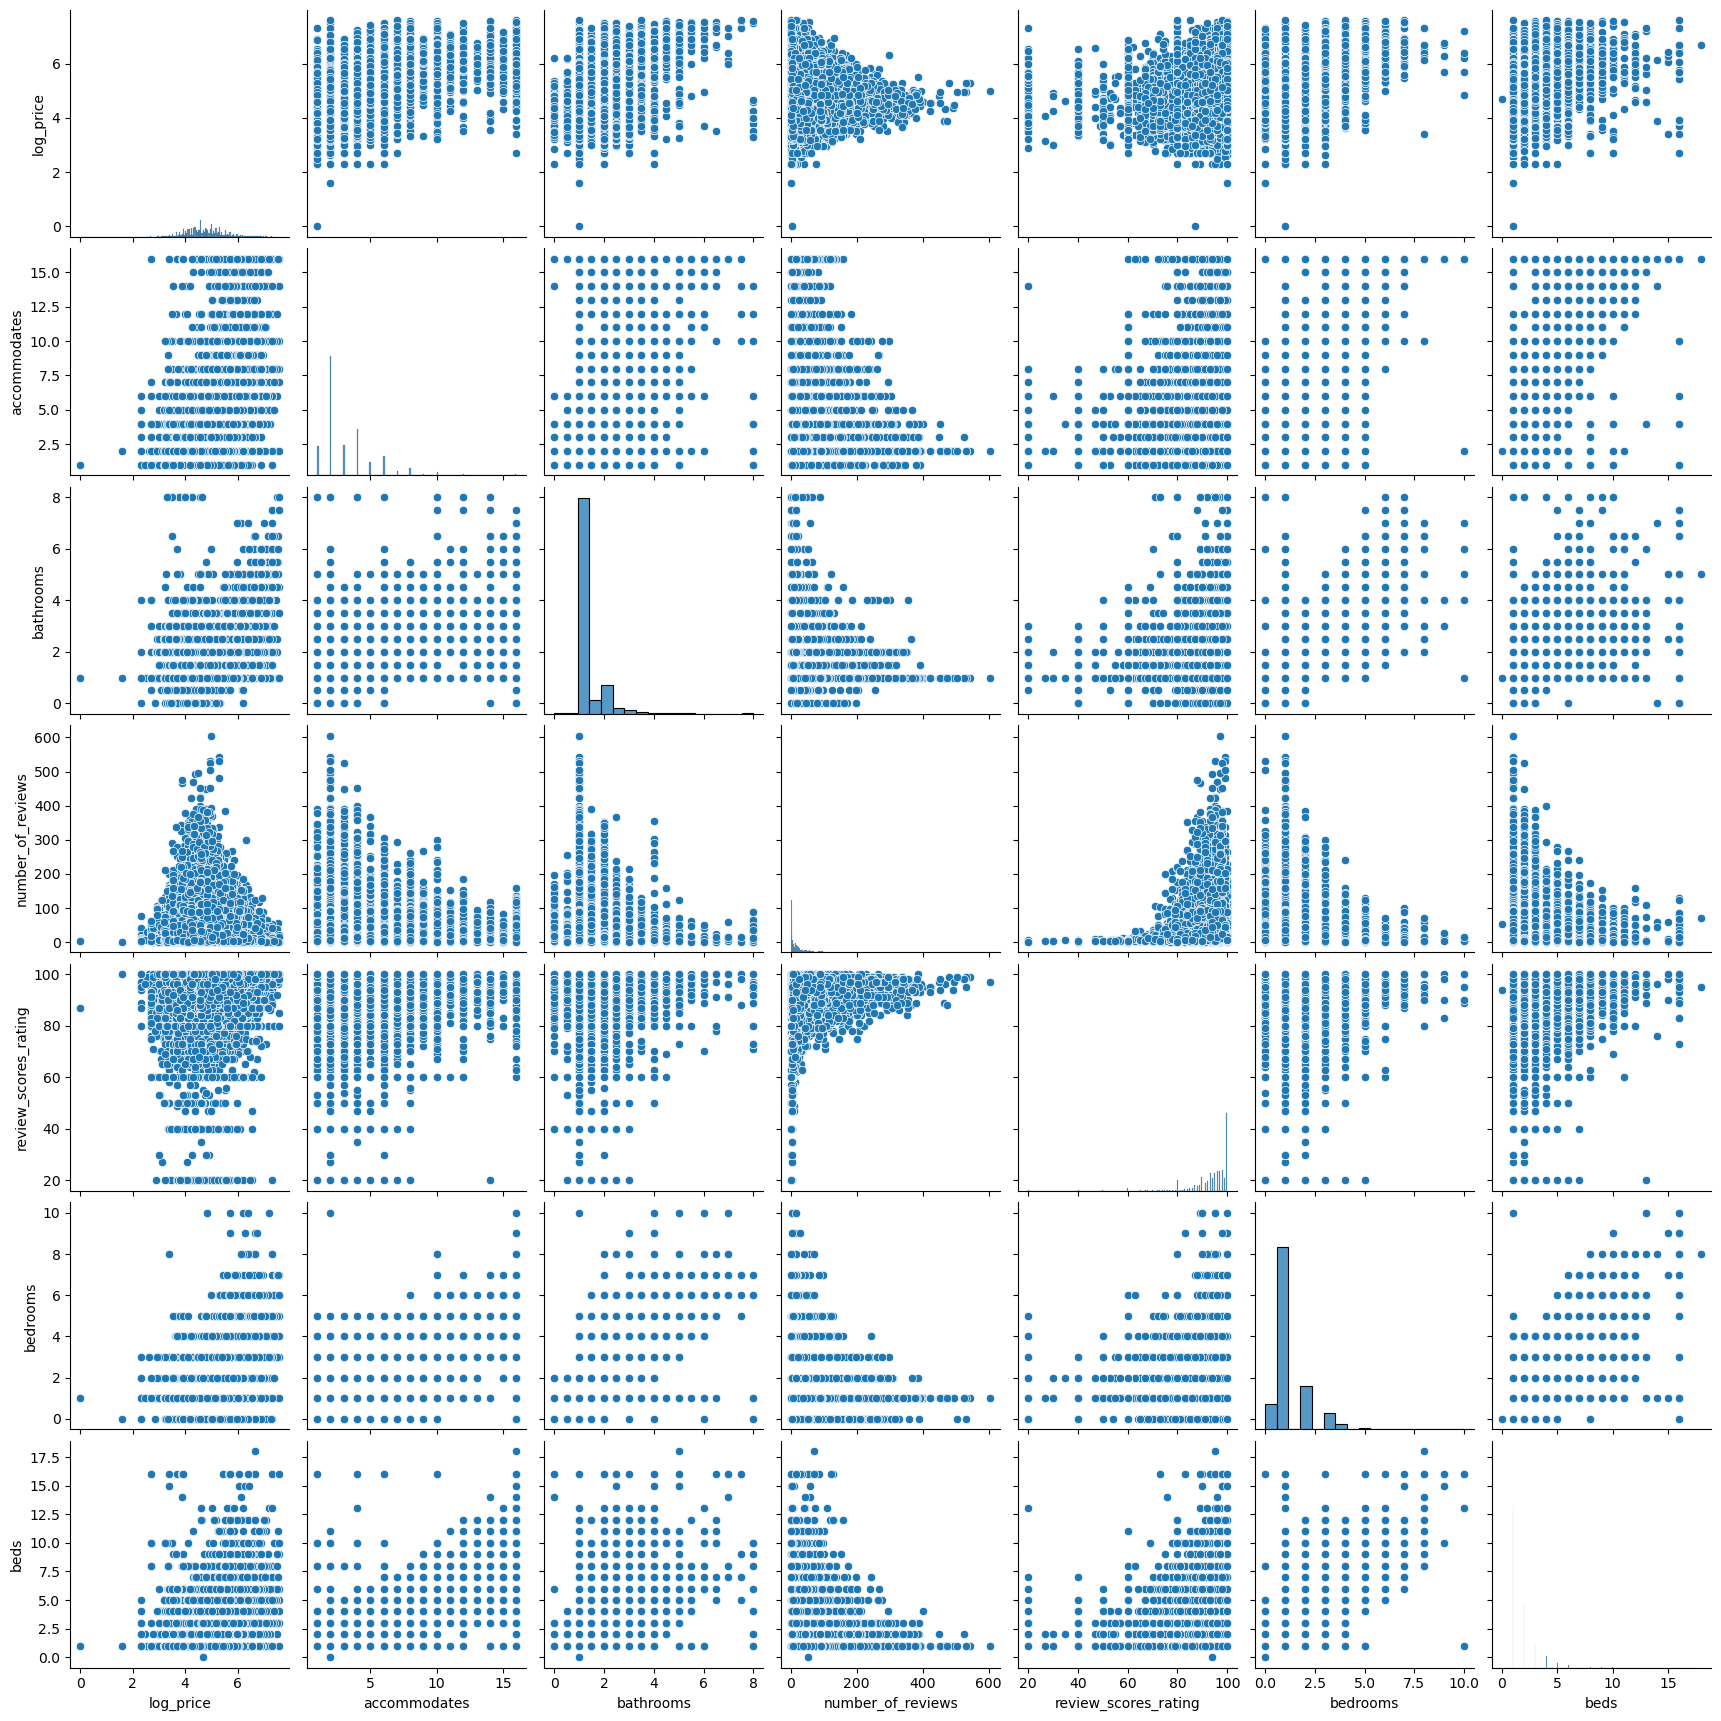

In [30]:
sns.pairplot(subset_df)

### Skewness

In [31]:
skew_matrix = pd.DataFrame(columns=subset_df.columns)
for column in subset_df.columns:
    skew_matrix.loc["Skewness", column] = subset_df[column].skew()
    
print(skew_matrix)

         log_price accommodates bathrooms number_of_reviews  \
Skewness  0.370813     2.184333  3.620546          3.340176   

         review_scores_rating  bedrooms      beds  
Skewness            -3.381592  1.892448  3.184854  


### Nine Graphs

In [32]:
import pandas as pd
import matplotlib.pyplot as plt


#### room type

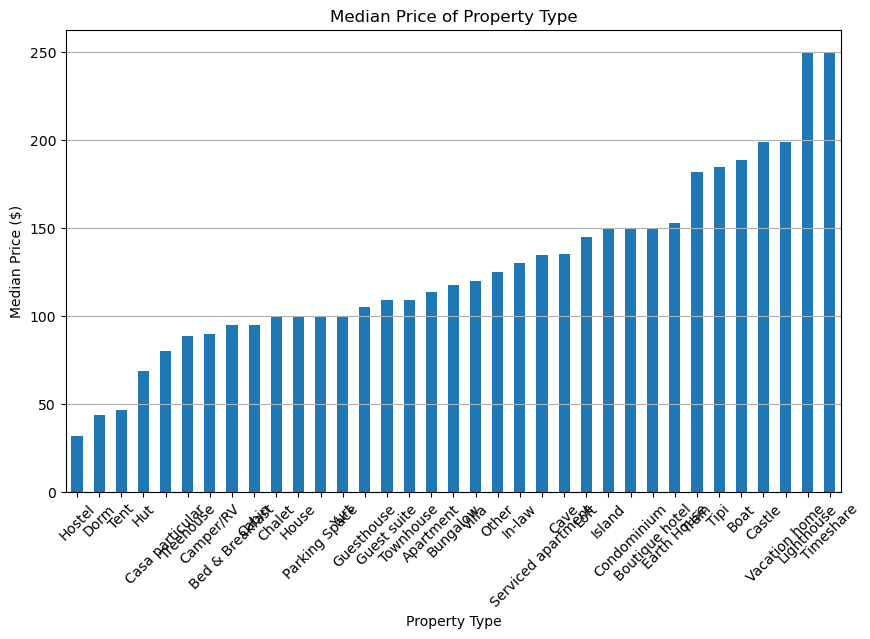

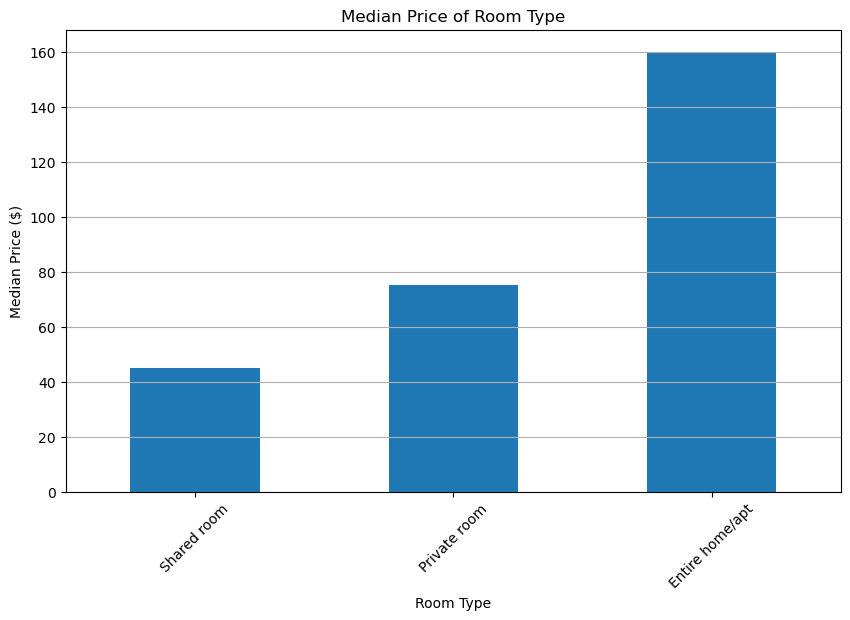

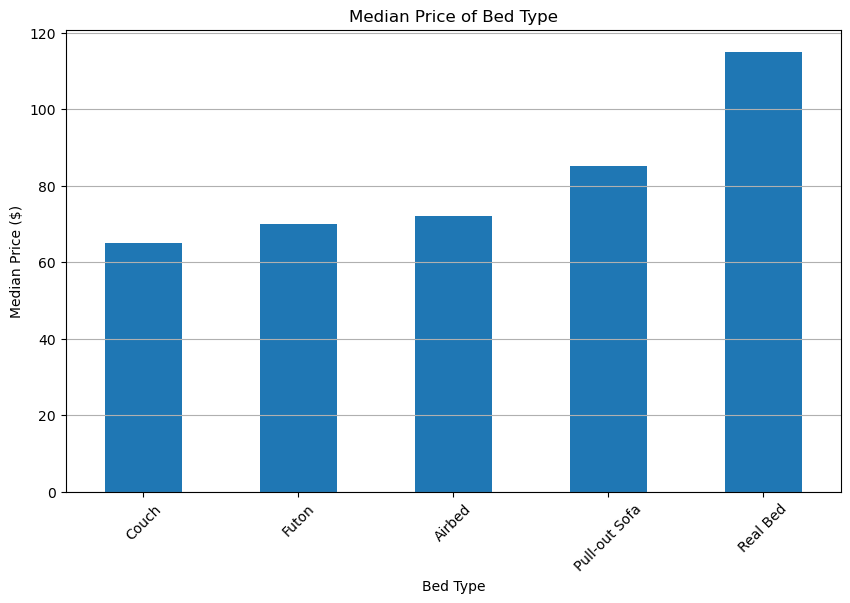

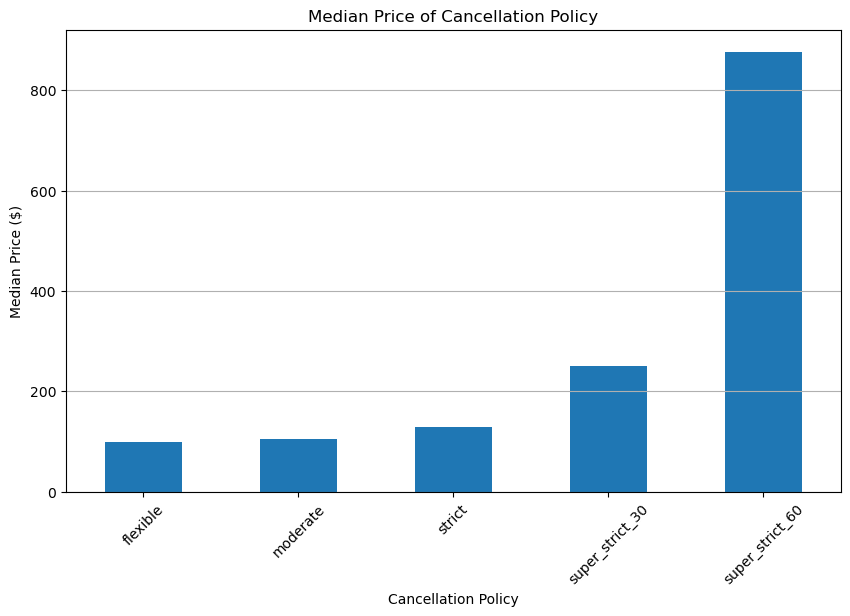

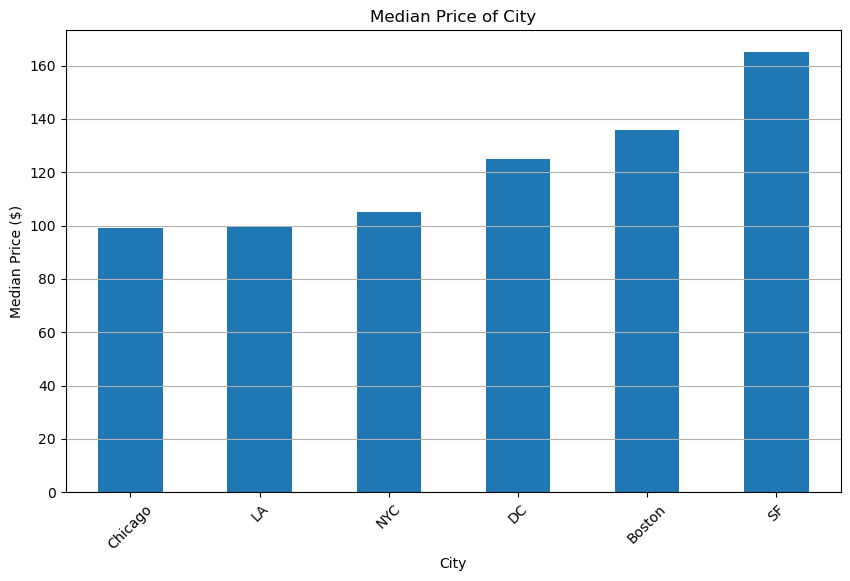

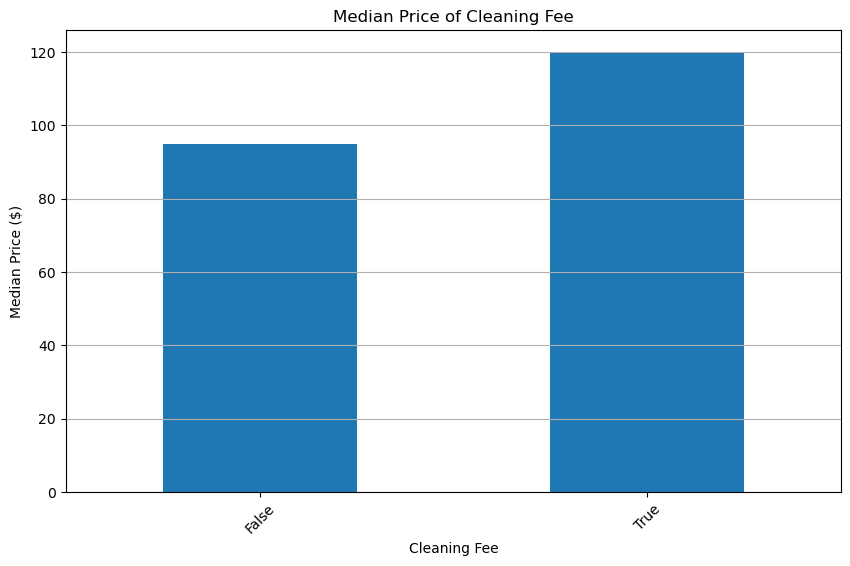

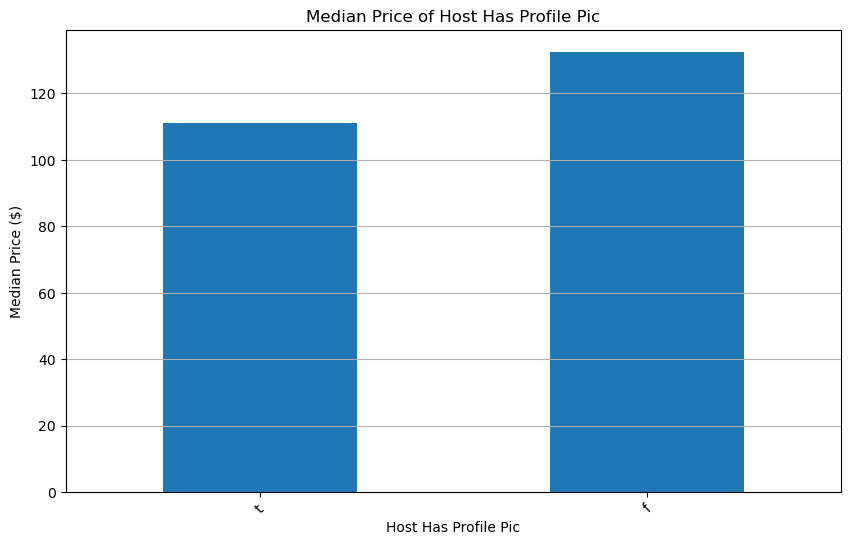

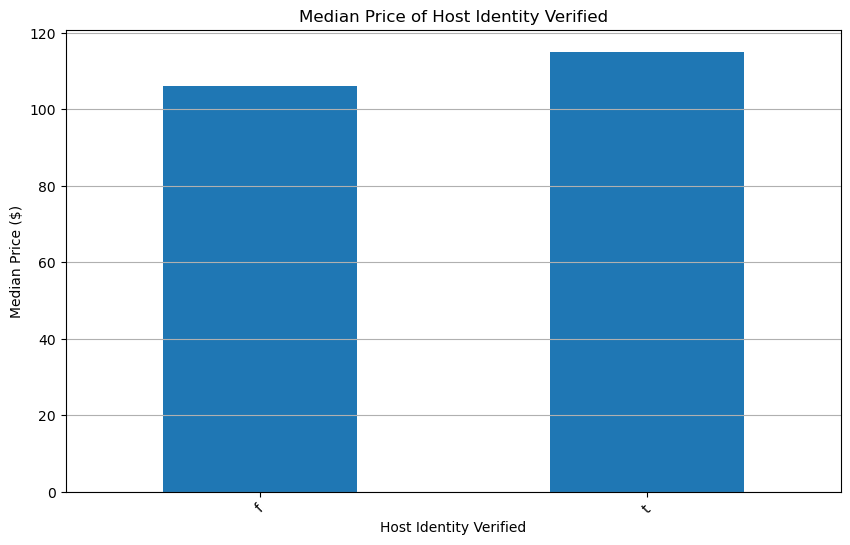

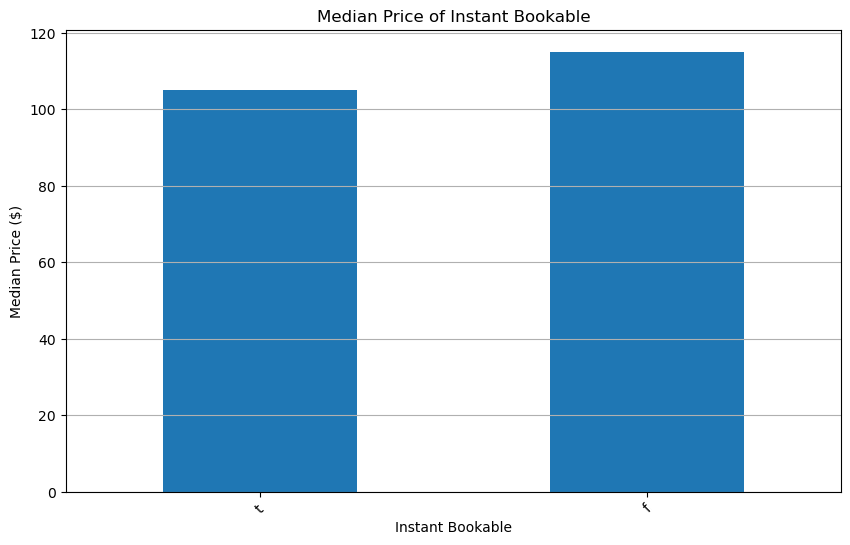

In [33]:
# List of columns to plot
columns_to_plot = [
    'property_type', 'room_type', 'bed_type', 'cancellation_policy',
    'city', 'cleaning_fee', 'host_has_profile_pic', 'host_identity_verified',
    'instant_bookable'
]

def plot_median_price_for_column(column_name, df):
    median_price = df.groupby(column_name)['log_price'].median().sort_values()
    median_price_exp = np.exp(median_price)

    plt.figure(figsize=(10, 6))
    median_price_exp.plot(kind='bar')
    plt.title(f'Median Price of {column_name.replace("_", " ").title()}')
    plt.xlabel(column_name.replace("_", " ").title())
    plt.ylabel('Median Price ($)')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

for column in columns_to_plot:
    plot_median_price_for_column(column, df)


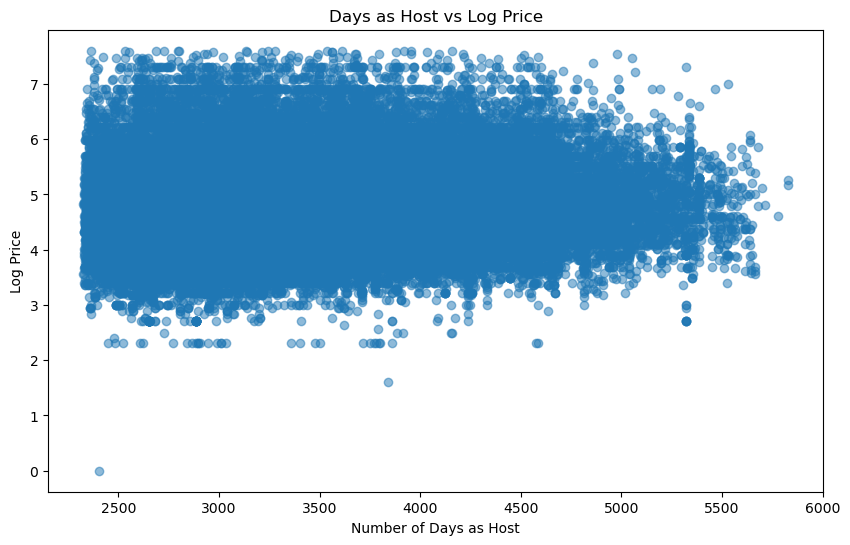

Correlation coefficient: 0.07833307798072493


In [34]:
from datetime import datetime

# Convert 'host_since' to datetime
df_encoded['host_since'] = pd.to_datetime(df_encoded['host_since'])

# Calculate the number of days from 'host_since' to a reference date (e.g., current date)
df_encoded['days_as_host'] = (datetime.now() - df_encoded['host_since']).dt.days

# Plot 'days_as_host' vs 'log_price'
plt.figure(figsize=(10, 6))
plt.scatter(df_encoded['days_as_host'], df_encoded['log_price'], alpha=0.5)
plt.title('Days as Host vs Log Price')
plt.xlabel('Number of Days as Host')
plt.ylabel('Log Price')
plt.show()

# Calculate the correlation coefficient
correlation = df_encoded['days_as_host'].corr(df_encoded['log_price'])
print(f"Correlation coefficient: {correlation}")

In [35]:
df_encoded.drop(['days_as_host','host_since','number_of_reviews', 'review_scores_rating','latitude','longitude','amenities','instant_bookable_f','instant_bookable_t','host_identity_verified_f','host_identity_verified_t'], axis=1, inplace=True)
df_encoded.shape

(73923, 67)

In [36]:
df_encoded

,id,log_price,accommodates,bathrooms,description,host_response_rate,name,bedrooms,beds,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Casa particular,property_type_Castle,property_type_Cave,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_Earth House,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Hut,property_type_In-law,property_type_Island,property_type_Lighthouse,property_type_Loft,property_type_Other,property_type_Parking Space,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tipi,property_type_Townhouse,property_type_Train,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,cleaning_fee_False,cleaning_fee_True,host_has_profile_pic_f,host_has_profile_pic_t
0,6901257,5.010635,3.0,1.0,"Beautiful, sunlit brownstone 1-bedroom in the ...",100.0,Beautiful brownstone 1-bedroom,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
1,6304928,5.129899,7.0,1.0,Enjoy travelling during your stay in Manhattan...,100.0,Superb 3BR Apt Located Near Times Square,3.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
2,7919400,4.976734,5.0,1.0,The Oasis comes complete with a full backyard ...,100.0,The Garden Oasis,1.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1
3,13418779,6.620073,4.0,1.0,This light-filled home-away-from-home is super...,100.0,Beautiful Flat in the Heart of SF!,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1
4,3808709,4.744932,2.0,1.0,"Cool, cozy, and comfortable studio located in ...",100.0,Great studio in midtown DC,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,1.0,1.0,one room in bushwick apt,100.0,one room bushwick,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1
74107,13281809,5.043425,4.0,2.0,"Located on the Pacific Coast Highway, this apa...",100.0,Spacious Hermosa 2 BR on PCH,2.0,4.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
74108,18688039,5.220356,5.0,1.0,A modern apartment located in East Williamsbur...,100.0,Modern 2 Bedroom Apartment in Williamsburg,2.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1
74109,17045948,5.273000,2.0,1.0,"Fully renovated, designer's studio located in ...",100.0,Designer's Apartment in HEART of NYC,0.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


In [39]:
csv_file_path = './airbnb_dataset/data.csv'
df_encoded.to_csv(csv_file_path, index=False)

In [40]:

df = pd.read_csv(csv_file_path)
# Display the first few rows of the DataFrame
df.head()

,id,log_price,accommodates,bathrooms,description,host_response_rate,name,bedrooms,beds,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Casa particular,property_type_Castle,property_type_Cave,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_Earth House,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Hut,property_type_In-law,property_type_Island,property_type_Lighthouse,property_type_Loft,property_type_Other,property_type_Parking Space,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tipi,property_type_Townhouse,property_type_Train,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,cleaning_fee_False,cleaning_fee_True,host_has_profile_pic_f,host_has_profile_pic_t
0,6901257,5.010635,3.0,1.0,"Beautiful, sunlit brownstone 1-bedroom in the ...",100.0,Beautiful brownstone 1-bedroom,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
1,6304928,5.129899,7.0,1.0,Enjoy travelling during your stay in Manhattan...,100.0,Superb 3BR Apt Located Near Times Square,3.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
2,7919400,4.976734,5.0,1.0,The Oasis comes complete with a full backyard ...,100.0,The Garden Oasis,1.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1
3,13418779,6.620073,4.0,1.0,This light-filled home-away-from-home is super...,100.0,Beautiful Flat in the Heart of SF!,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1
4,3808709,4.744932,2.0,1.0,"Cool, cozy, and comfortable studio located in ...",100.0,Great studio in midtown DC,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1
